In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dfx=pd.read_csv('Training Data/Diabetes_XTrain.csv')
dfy=pd.read_csv('Training Data/Diabetes_YTrain.csv')
print(dfx.shape,dfy.shape)
print(dfx.columns)
print(dfx.head(n=5))
print(dfy.head(n=5))

(576, 8) (576, 1)
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            7      168             88             42      321  38.2   
1            8      110             76              0        0  27.8   
2            7      147             76              0        0  39.4   
3            2      100             66             20       90  32.9   
4            4      129             86             20      270  35.1   

   DiabetesPedigreeFunction  Age  
0                     0.787   40  
1                     0.237   58  
2                     0.257   43  
3                     0.867   28  
4                     0.231   23  
   Outcome
0        1
1        0
2        1
3        1
4        0


(array([0, 1], dtype=int64), array([375, 201], dtype=int64))


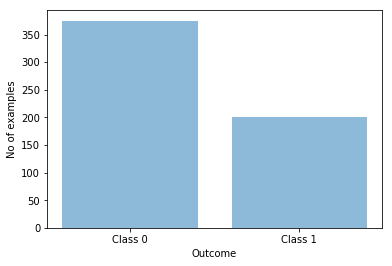

In [20]:
X_train=dfx.values
Y_train=dfy.values
Y_plot=np.unique(Y_train,return_counts=True)
print(Y_plot)
objects=['Class 0','Class 1']
plt.bar(Y_plot[0],Y_plot[1],align='center',alpha=0.5)
plt.xticks(Y_plot[0],objects)
plt.xlabel('Outcome')
plt.ylabel('No of examples')
plt.show()

In [21]:
#knn algo
def dist(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(X,Y,queryPoint,k=5):
    vals=[]
    m=X.shape[0]
    for i in range(m):
        d=dist(queryPoint,X[i])
        vals.append((d,Y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_vals=np.unique(vals[:,1],return_counts=True)
    index=new_vals[1].argmax()
    pred=new_vals[0][index]
    return pred

In [23]:
dfx=pd.read_csv('Test Cases/Diabetes_Xtest.csv')
X_test=dfx.values
print(X_test.shape)

(192, 8)


In [29]:
def get_prediction():
    m=X_test.shape[0]
    Y_pred=[]
    for i in range(m):
        p=knn(X_train,Y_train,X_test[i])
        Y_pred.append(int(p))
    return Y_pred

In [30]:
y_pred=get_prediction()
print(len(y_pred))

192


In [31]:
ans=pd.DataFrame(y_pred,columns=['Outcome'])
ans.to_csv('submit.csv',index=False) 